## Load and Preview Dataset

We begin by loading the BLS dataset and inspecting its structure. This helps us understand the available columns, identify relevant features, and determine how to clean or transform the data for analysis.

In [1]:
import pandas as pd

# Load the dataset
file_path = "all_data_M_2024.xlsx"
bls_df = pd.read_excel(file_path)

# Preview first few rows
bls_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.8,37.89,60.44,29990,36730,49500,78810,125720,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,58.7,82.5,#,57010,79900,122090,171610,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,50.48,81.01,#,47510,68800,104990,168490,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.24,#,#,73710,126080,206420,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.24,#,#,73710,126080,206420,#,#,NaN,NaN


In [2]:
# List all sheet names
pd.ExcelFile(file_path).sheet_names

['All May 2024 data', 'Field Descriptions', 'UpdateTime', 'Filler']

In [3]:
bls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409517 entries, 0 to 409516
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          409517 non-null  int64 
 1   AREA_TITLE    409517 non-null  object
 2   AREA_TYPE     409517 non-null  int64 
 3   PRIM_STATE    409517 non-null  object
 4   NAICS         409517 non-null  object
 5   NAICS_TITLE   409517 non-null  object
 6   I_GROUP       409517 non-null  object
 7   OWN_CODE      409517 non-null  int64 
 8   OCC_CODE      409517 non-null  object
 9   OCC_TITLE     409517 non-null  object
 10  O_GROUP       409517 non-null  object
 11  TOT_EMP       409517 non-null  object
 12  EMP_PRSE      409517 non-null  object
 13  JOBS_1000     231693 non-null  object
 14  LOC_QUOTIENT  231693 non-null  object
 15  PCT_TOTAL     170758 non-null  object
 16  PCT_RPT       170758 non-null  object
 17  H_MEAN        409517 non-null  object
 18  A_MEAN        409517 non

### Understanding OCC_CODE Categories (SOC Major Groups)

The `OCC_CODE` field in the BLS dataset follows the **Standard Occupational Classification (SOC)** system. The **first two digits** indicate the **major occupational group**. These categories help classify and analyze labor data across all industries.

Below is the complete list of **23 SOC Major Groups**, along with example roles and general fields:

| OCC_CODE Prefix | Major Occupational Group                                      | Common Fields / Example Roles                            |
|-----------------|---------------------------------------------------------------|-----------------------------------------------------------|
| **11**          | Management Occupations                                        | Executives, Project Managers, Operations Directors        |
| **13**          | Business and Financial Operations Occupations                 | Financial Analysts, HR Specialists, Compliance Officers   |
| **15**          | Computer and Mathematical Occupations                         | Software Developers, Data Scientists, Statisticians       |
| **17**          | Architecture and Engineering Occupations                      | Civil Engineers, Mechanical Engineers, Systems Architects |
| **19**          | Life, Physical, and Social Science Occupations                | Chemists, Economists, Environmental Scientists            |
| **21**          | Community and Social Service Occupations                      | Social Workers, Counselors, Health Educators              |
| **23**          | Legal Occupations                                              | Lawyers, Paralegals, Judges                               |
| **25**          | Education, Training, and Library Occupations                  | Teachers, Librarians, Instructional Designers             |
| **27**          | Arts, Design, Entertainment, Sports, and Media Occupations    | UX Designers, Journalists, Musicians                      |
| **29**          | Healthcare Practitioners and Technical Occupations            | Physicians, Registered Nurses, Medical Technologists      |
| **31**          | Healthcare Support Occupations                                | Medical Assistants, Home Health Aides                     |
| **33**          | Protective Service Occupations                                | Police Officers, Firefighters, Security Guards            |
| **35**          | Food Preparation and Serving Related Occupations              | Chefs, Cooks, Servers                                     |
| **37**          | Building and Grounds Cleaning and Maintenance Occupations     | Janitors, Groundskeepers, Pest Control Workers            |
| **39**          | Personal Care and Service Occupations                         | Childcare Workers, Hairstylists, Fitness Trainers         |
| **41**          | Sales and Related Occupations                                 | Retail Salespersons, Real Estate Agents, Sales Engineers  |
| **43**          | Office and Administrative Support Occupations                 | Administrative Assistants, Clerks, Dispatchers            |
| **45**          | Farming, Fishing, and Forestry Occupations                    | Agricultural Workers, Fishers, Loggers                    |
| **47**          | Construction and Extraction Occupations                       | Carpenters, Electricians, Heavy Equipment Operators        |
| **49**          | Installation, Maintenance, and Repair Occupations             | Mechanics, HVAC Technicians, IT Repair Specialists        |
| **51**          | Production Occupations                                        | Assemblers, Machinists, Tool Operators                    |
| **53**          | Transportation and Material Moving Occupations                | Truck Drivers, Pilots, Package Handlers                   |
| **55**          | Military Specific Occupations                                 | Enlisted Personnel, Officers, Combat Roles                |

This classification is helpful for:
- Grouping similar occupations
- Understanding trends by category
- Feature engineering (e.g., using `OCC_MAJOR` in modeling)

**Reference**: [Bureau of Labor Statistics – SOC Major Groups](https://www.bls.gov/soc/2018/major_groups.htm)

### Combined Filtering by SOC Group and Tech Keywords

To create a clean, tech-focused dataset, we applied two layers of filtering:
1. **SOC Group Filtering**: We retained only major occupation groups relevant to tech, such as Computer & Mathematical, Engineering, and IT Management (OCC_CODE prefixes 11, 13, 15, 17, etc.).
2. **Keyword Filtering**: We further filtered job titles using tech-related keywords such as “developer,” “engineer,” “data,” “IT,” and “cyber.”

This dual-filter approach ensures our model is trained on relevant job types while excluding unrelated roles from other industries.

In [8]:
import re

# List of keywords commonly found in tech-related occupations
tech_keywords = r'\b(?:software|developer|computer|data|it|information|technology|programmer|engineer|web|cyber|network|systems|cloud|security|analyst|devops|ai|ml|machine learning)\b'

In [16]:
# Extract OCC_MAJOR (first 2 digits of OCC_CODE)
bls_df['OCC_MAJOR'] = bls_df['OCC_CODE'].astype(str).str[:2]

# Keep only rows where OCC_MAJOR is tech-relevant
tech_major_codes = ['11', '13', '15', '17', '19', '27', '41', '49', '51']
filtered_by_group = bls_df[bls_df['OCC_MAJOR'].isin(tech_major_codes)]

# Now apply keyword filtering on OCC_TITLE
filtered_tech_df = filtered_by_group[
    filtered_by_group['OCC_TITLE'].str.lower().str.contains(tech_keywords, regex=True, na=False)
]

# Exclude unrelated titles manually
excluded_keywords = r'\b(?:assembler|rigging|machinist|mechanic|welder|fabricator|operator|repairer|driller|inspector)\b'

filtered_tech_df = filtered_tech_df[
    ~filtered_tech_df['OCC_TITLE'].str.lower().str.contains(excluded_keywords, regex=True, na=False)
]

print(f"Filtered down to {filtered_tech_df.shape[0]} rows after applying SOC group and keyword filters.")

Filtered down to 17398 rows after applying SOC group and keyword filters.


In [17]:
filtered_tech_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,OCC_MAJOR
22,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-3020,Computer and Information Systems Managers,...,103.95,#,104450,134350,171200,216220,#,NaN,NaN,11
23,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-3021,Computer and Information Systems Managers,...,103.95,#,104450,134350,171200,216220,#,NaN,NaN,11
132,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,...,70.51,86.59,54100,76350,105850,146650,180110,NaN,NaN,15
133,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,15-1200,Computer Occupations,...,70.78,86.59,53340,76180,105990,147220,180110,NaN,NaN,15
134,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,15-1210,Computer and Information Analysts,...,65.96,81.76,64450,82550,106890,137190,170060,NaN,NaN,15


In [18]:
filtered_tech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17398 entries, 22 to 406768
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AREA          17398 non-null  int64 
 1   AREA_TITLE    17398 non-null  object
 2   AREA_TYPE     17398 non-null  int64 
 3   PRIM_STATE    17398 non-null  object
 4   NAICS         17398 non-null  object
 5   NAICS_TITLE   17398 non-null  object
 6   I_GROUP       17398 non-null  object
 7   OWN_CODE      17398 non-null  int64 
 8   OCC_CODE      17398 non-null  object
 9   OCC_TITLE     17398 non-null  object
 10  O_GROUP       17398 non-null  object
 11  TOT_EMP       17398 non-null  object
 12  EMP_PRSE      17398 non-null  object
 13  JOBS_1000     8321 non-null   object
 14  LOC_QUOTIENT  8321 non-null   object
 15  PCT_TOTAL     8889 non-null   object
 16  PCT_RPT       8889 non-null   object
 17  H_MEAN        17398 non-null  object
 18  A_MEAN        17398 non-null  object
 19  MEAN_PR

In [19]:
filtered_tech_df['OCC_TITLE'].nunique()

29

In [20]:
sorted(filtered_tech_df['OCC_TITLE'].dropna().unique())[:20]

['Computer Hardware Engineers',
 'Computer Network Architects',
 'Computer Network Support Specialists',
 'Computer Numerically Controlled Tool Operators',
 'Computer Numerically Controlled Tool Operators and Programmers',
 'Computer Numerically Controlled Tool Programmers',
 'Computer Occupations',
 'Computer Occupations, All Other',
 'Computer Programmers',
 'Computer Support Specialists',
 'Computer Systems Analysts',
 'Computer User Support Specialists',
 'Computer and Information Analysts',
 'Computer and Information Research Scientists',
 'Computer and Information Systems Managers',
 'Computer and Mathematical Occupations',
 'Computer, Automated Teller, and Office Machine Repairers',
 'Data Scientists',
 'Database and Network Administrators and Architects',
 'Electronics Engineers, Except Computer']

### Identifying Missing Values

Before moving forward with modeling, it's important to understand where missing data exists in our tech-filtered dataset. This step helps us decide whether to drop rows, impute values, or take other precautions to avoid skewed results.

In [21]:
# Count missing values in each column
missing_summary = filtered_tech_df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]

HOURLY          17398
ANNUAL          17398
LOC_QUOTIENT     9077
JOBS_1000        9077
PCT_RPT          8509
PCT_TOTAL        8509
dtype: int64

### Missing Value Summary

We found that a handful of columns have missing values, most notably:
- `HOURLY` and `ANNUAL`: missing in **100%** of rows (these may be placeholder or deprecated columns)
- `LOC_QUOTIENT`, `JOBS_1000`, `PCT_RPT`, and `PCT_TOTAL`: missing in ~50% of rows

These fields are primarily used for **contextual labor metrics** rather than salary prediction and may be candidates for removal.

In [22]:
# Calculate percentage of missing values for each column
missing_percent = (filtered_tech_df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent[missing_percent > 0]

HOURLY          100.000000
ANNUAL          100.000000
LOC_QUOTIENT     52.172664
JOBS_1000        52.172664
PCT_RPT          48.907920
PCT_TOTAL        48.907920
dtype: float64

### Interpreting Missing Value Percentages

The `HOURLY` and `ANNUAL` columns are entirely empty (100% missing), suggesting they are either deprecated or irrelevant for this dataset release. The `LOC_QUOTIENT`, `JOBS_1000`, `PCT_RPT`, and `PCT_TOTAL` fields are missing in roughly 50% of the data and are mostly auxiliary labor market indicators.

These columns are not directly tied to our salary prediction target (`A_MEDIAN`), so removing them — or the rows they appear in — is unlikely to significantly impact the core model performance.

In [23]:
# Store original row count
original_count = filtered_tech_df.shape[0]

# Drop rows with any missing values
tech_df_cleaned = filtered_tech_df.dropna()

# Report how much data was dropped
cleaned_count = tech_df_cleaned.shape[0]
print(f"Original: {original_count} rows")
print(f"After dropping nulls: {cleaned_count} rows")
print(f"Rows dropped: {original_count - cleaned_count} ({(original_count - cleaned_count)/original_count:.2%})")

Original: 17398 rows
After dropping nulls: 0 rows
Rows dropped: 17398 (100.00%)


### Strategy Update: Column-Wise Cleaning First

Dropping all rows with missing values would eliminate the entire dataset. This is because two unused columns — `HOURLY` and `ANNUAL` — are 100% missing.

Since these columns are not used in our salary prediction task, we will drop them from the dataset first. This allows us to then evaluate missing values in the remaining, more relevant fields without losing all our data.

In [24]:
# Drop unused columns that are 100% missing
tech_df_cleaned = filtered_tech_df.drop(columns=['HOURLY', 'ANNUAL'])

# Check remaining missing values
tech_df_cleaned.isnull().sum()

AREA               0
AREA_TITLE         0
AREA_TYPE          0
PRIM_STATE         0
NAICS              0
NAICS_TITLE        0
I_GROUP            0
OWN_CODE           0
OCC_CODE           0
OCC_TITLE          0
O_GROUP            0
TOT_EMP            0
EMP_PRSE           0
JOBS_1000       9077
LOC_QUOTIENT    9077
PCT_TOTAL       8509
PCT_RPT         8509
H_MEAN             0
A_MEAN             0
MEAN_PRSE          0
H_PCT10            0
H_PCT25            0
H_MEDIAN           0
H_PCT75            0
H_PCT90            0
A_PCT10            0
A_PCT25            0
A_MEDIAN           0
A_PCT75            0
A_PCT90            0
OCC_MAJOR          0
dtype: int64

### Final Cleaning: Dropping Contextual Columns with Missing Values

After removing the 100% missing columns (`HOURLY`, `ANNUAL`), we reviewed the remaining null values. Only four columns still had missing data: `JOBS_1000`, `LOC_QUOTIENT`, `PCT_TOTAL`, and `PCT_RPT`.

These are contextual labor metrics not required for our salary prediction task. To preserve data integrity and avoid row-level loss, we opted to drop these columns rather than impute or remove rows.

In [25]:
# Drop remaining columns with missing values (not essential for modeling)
cols_to_drop = ['JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT']
tech_df_cleaned = tech_df_cleaned.drop(columns=cols_to_drop)

# Confirm no missing values remain
tech_df_cleaned.isnull().sum().sum()

0

### Validating Dataset Integrity After Cleaning

Now that we’ve dropped non-essential columns with missing data, we compare the cleaned dataset to the original filtered version. We focus on the distribution of salaries and the diversity of job titles to ensure we didn’t unintentionally lose valuable information.

In [26]:
print("Unique job titles before cleaning:", filtered_tech_df['OCC_TITLE'].nunique())
print("Unique job titles after cleaning:", tech_df_cleaned['OCC_TITLE'].nunique())

Unique job titles before cleaning: 29
Unique job titles after cleaning: 29


In [28]:
# Ensure A_MEDIAN is numeric
filtered_tech_df['A_MEDIAN'] = pd.to_numeric(filtered_tech_df['A_MEDIAN'], errors='coerce')
tech_df_cleaned['A_MEDIAN'] = pd.to_numeric(tech_df_cleaned['A_MEDIAN'], errors='coerce')

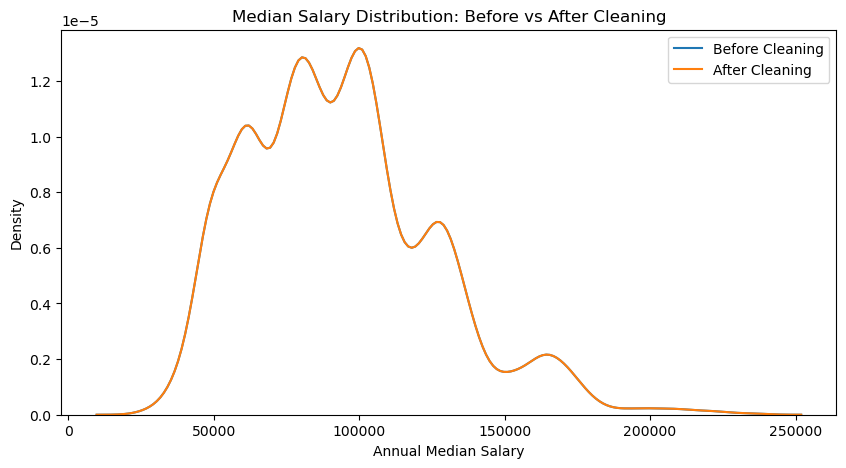

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(filtered_tech_df['A_MEDIAN'].dropna(), label='Before Cleaning')
sns.kdeplot(tech_df_cleaned['A_MEDIAN'].dropna(), label='After Cleaning')
plt.title('Median Salary Distribution: Before vs After Cleaning')
plt.xlabel('Annual Median Salary')
plt.legend()
plt.show()

In [ ]:
# Drop rows where A_MEAN or H_MEAN is missing
tech_clean_df = tech_clean_df.dropna(subset=['A_MEAN', 'H_MEAN']).reset_index(drop=True)
print("Cleaned tech dataset shape:", tech_clean_df.shape)

### Filtering Rows with Missing Wage Data

To ensure meaningful salary analysis, we keep only rows where average annual (`A_MEAN`) and hourly (`H_MEAN`) wage data is available. This reduces the dataset while preserving relevant information.

### Converting Wage Columns to Numeric

Wage columns are stored as strings, which prevents numerical operations. We convert key wage-related columns to numeric values, coercing any formatting issues (like commas or non-numeric entries).

In [ ]:
# List of wage columns to convert
wage_columns = [
    'A_MEAN', 'H_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Convert columns to numeric (coerce errors like commas or bad entries to NaN)
for col in wage_columns:
    tech_clean_df[col] = pd.to_numeric(tech_clean_df[col], errors='coerce')

# Confirm success
tech_clean_df[wage_columns].dtypes

### Wage Columns Converted

All selected wage-related columns have been successfully converted to numeric format. This allows for accurate statistical analysis, plotting, and modeling.

### Wage Distributions for Tech Occupations

To explore earnings across tech-related occupations, we begin by visualizing the distribution of average annual (`A_MEAN`) and hourly (`H_MEAN`) wages. This helps us identify outliers, trends, and central tendencies.

In [ ]:
import matplotlib.pyplot as plt

# Set up figure
plt.figure(figsize=(14, 6))

# Annual wage histogram
plt.subplot(1, 2, 1)
tech_clean_df['A_MEAN'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Annual Mean Wages')
plt.xlabel('Annual Mean Wage ($)')
plt.ylabel('Frequency')

# Hourly wage histogram
plt.subplot(1, 2, 2)
tech_clean_df['H_MEAN'].plot(kind='hist', bins=50, edgecolor='black', color='orange')
plt.title('Distribution of Hourly Mean Wages')
plt.xlabel('Hourly Mean Wage ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Top-Paying Tech Occupations

This chart highlights the 15 highest-paying tech roles based on average annual wage.

In [ ]:
top_paying_roles = (
    tech_clean_df.groupby('OCC_TITLE')['A_MEAN']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
top_paying_roles.plot(kind='barh', color='seagreen')
plt.title('Top 15 Highest-Paying Tech Occupations')
plt.xlabel('Average Annual Wage ($)')
plt.ylabel('Occupation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Job Role Distribution

We examine how frequently different tech roles appear in the dataset. This helps us understand which occupations are more represented across the U.S. in the BLS data.

In [ ]:
# Count how many times each occupation appears
occupation_counts = (
    tech_clean_df['OCC_TITLE']
    .value_counts()
    .head(15)
)

# Plot
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='barh', color='coral')
plt.title('Top 15 Most Common Tech Occupations in Dataset')
plt.xlabel('Number of Records')
plt.ylabel('Occupation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Regional Salary Trends Across the U.S.

To examine geographic salary trends, we calculate the average annual wage (`A_MEAN`) for tech roles by state.

In [ ]:
# Average salary by state
state_salary = tech_clean_df.groupby('PRIM_STATE')['A_MEAN'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
state_salary.plot(kind='bar', color='slateblue')
plt.title('Average Tech Salary by State')
plt.xlabel('State')
plt.ylabel('Average Annual Wage ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Do Highly-Paid Roles Also Employ the Most People?

This scatter plot compares average salary to total employment across tech roles. Roles in the top right are both highly paid and widely employed.

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(summary['total_employment'], summary['avg_salary'], alpha=0.7, edgecolor='gray')

# Annotate top 5 by employment
top_jobs = summary.sort_values(by='total_employment', ascending=False).head(5)
for i, row in top_jobs.iterrows():
    plt.text(row['total_employment'], row['avg_salary'], i, fontsize=9, ha='right')

# Annotate top 5 by salary
top_salaries = summary.sort_values(by='avg_salary', ascending=False).head(5)
for i, row in top_salaries.iterrows():
    plt.text(row['total_employment'], row['avg_salary'], i, fontsize=9, ha='left')

plt.xscale('log')
plt.title('Salary vs. Employment by Occupation')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Average Annual Wage ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Grouping Occupations by Wage and Employment

This bubble chart visualizes tech occupations by average salary and total employment. Larger bubbles represent roles with greater workforce size.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Refresh OCC_GROUP (if needed)
top_occ = tech_clean_df['OCC_TITLE'].value_counts().index[:10]
summary['OCC_GROUP'] = summary.index.to_series().apply(lambda x: x if x in top_occ else 'Other')

# Filter out less relevant groups
filtered_summary = summary[
    ~summary['OCC_GROUP'].isin(['Other', 'Data Entry Keyers', 'Receptionists and Information Clerks'])
].copy()

# Scale bubble size
filtered_summary['scaled_emp'] = filtered_summary['total_employment'] / 100

# Create the bubble chart
plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=filtered_summary,
    x='total_employment',
    y='avg_salary',
    hue='OCC_GROUP',
    size='scaled_emp',
    sizes=(50000, 50000),  # more dramatic bubble scaling
    alpha=0.5,
    edgecolor='gray',
    linewidth=0.6,
    palette='tab10',
    legend='full'
)

plt.xscale('log')
plt.title('Tech Occupations Grouped by Wage and Employment (Focused View)')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Average Annual Wage ($)')
plt.grid(True, linestyle='--', linewidth=0.5)

# Clean up legend (remove size dots)
handles, labels = bubble.get_legend_handles_labels()
filtered = [(h, l) for h, l in zip(handles, labels) if not l.replace('.', '', 1).isdigit()]
bubble.legend(
    handles=[h for h, _ in filtered],
    labels=[l for _, l in filtered],
    title='Occupation Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

### Result: Tech Occupations Grouped by Wage and Employment

This focused bubble chart visualizes tech occupations by their average annual wage and total employment, with bubble size uniformly scaled for visual impact. Roles with the highest employment cluster to the right, while those with high wages appear higher on the chart. By filtering out less relevant occupations, this view highlights key tech roles with clearer differentiation across salary and scale.

## Feature Engineering

We now select and transform the most relevant features for salary prediction. The target variable is `A_MEAN`, representing the annual mean salary. Categorical features such as `OCC_TITLE` and `NAICS_TITLE` will be encoded to be used in regression models. Employment (`TOT_EMP`) will be retained as a numeric predictor.

### Exploring Categorical Features

To prepare the dataset for modeling, we begin by reviewing key categorical columns. Understanding the number of unique values in each helps determine whether to group, encode, or transform them for predictive analysis.

In [ ]:
# Explore categorical features
print("Unique OCC_TITLEs:", tech_clean_df['OCC_TITLE'].nunique())
print("Unique AREA_TITLEs:", tech_clean_df['AREA_TITLE'].nunique())
print("Unique PRIM_STATEs:", tech_clean_df['PRIM_STATE'].nunique())

To reduce sparsity and avoid overfitting, we group less frequent occupations into an "Other" category. This allows us to focus on the most common roles while preserving interpretability. We then apply one-hot encoding to the grouped occupation titles to prepare them for modeling.

In [ ]:
# Group less frequent occupations under "Other"
top_occupations = tech_clean_df['OCC_TITLE'].value_counts().index[:10]
tech_clean_df['OCC_GROUP'] = tech_clean_df['OCC_TITLE'].apply(lambda x: x if x in top_occupations else 'Other')

# One-hot encode the grouped occupation titles
df_encoded = pd.get_dummies(tech_clean_df, columns=['OCC_GROUP'], prefix='OCC')
# Confirm the new columns from OCC_GROUP one-hot encoding
df_encoded.filter(like='OCC_').columns

We now encode the state variable (`PRIM_STATE`) using one-hot encoding. Since there are only 54 unique values, this transformation preserves geographic detail without adding excessive dimensionality.

In [ ]:
# One-hot encode state abbreviations
df_encoded = pd.get_dummies(df_encoded, columns=['PRIM_STATE'], prefix='STATE')

In [ ]:
df_encoded.filter(like='STATE_').head(3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define target and features
target = 'A_MEAN'
features = ['OCC_TITLE', 'NAICS_TITLE', 'TOT_EMP']

X = filtered_df[features].copy()
y = filtered_df[target].copy()

# One-hot encode categorical variables
categorical_features = ['OCC_TITLE', 'NAICS_TITLE']
numeric_features = ['TOT_EMP']

# Build preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numeric_features)
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

## Step 6: Baseline Model – Linear Regression

We begin by training a baseline linear regression model using preprocessed features. This model will serve as a benchmark for more complex models such as Random Forest and XGBoost.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a pipeline: preprocessing + linear regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")